In [1]:
import numpy as np
import pandas as pd

# DataFrame

- DataFrame是一个表格型的数据类型，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔类型）
- DataFrame既有行索引，也有列索引，可以被看做由Series组成的字典（共用一个索引）
- DataFrame常用于表达二维数据，也可以用来表达多维数据

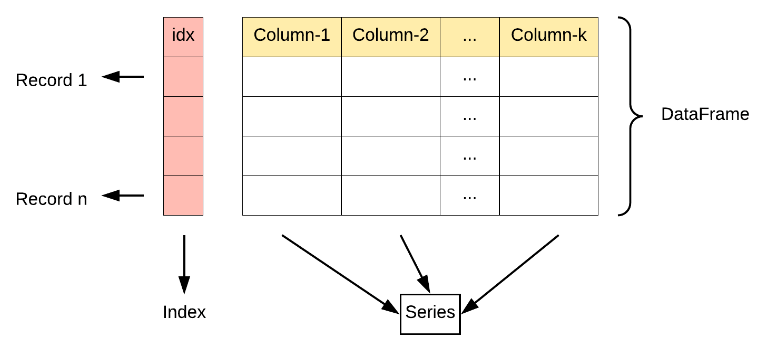

# DataFrame类型

DataFrame可以由以下类型创建：
- 二维ndarray
- Series类型
- 一维ndarray、列表、字典、元祖或Series构成的字典
- 其他DataFrame类型

In [2]:
# 从二维ndarray创建
# 自动生成行列索引
a = np.arange(10).reshape((2, 5))
df = pd.DataFrame(a)

df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


In [3]:
# 从一维ndarray对象字典创建
# 自定义行列索引
d = {
    'one': pd.Series([1, 2, 3], ['a', 'b', 'c']),
    'two': pd.Series([4, 5, 6], ['a', 'b', 'c']),
    'three': pd.Series([7, 8, 9], ['a', 'b', 'c'])
}

df = pd.DataFrame(d)
df

,one,two,three
a,1,4,7
b,2,5,8
c,3,6,9


In [4]:
# 从列表类型的字典创建
d = {
    'one': [1, 2, 3, 4],
    'two': [5, 6, 7, 8]
}

df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1,5
b,2,6
c,3,7
d,4,8


# DataFrame操作

DataFrame基本操作类似Series，依据行列索引

## 重新索引

reindex(index=None, columns=None, ...)
- index 新的自定义行索引
- columns 新的自定义列索引
- fill_value 重新索引中，填充缺失位置的值
- method 填充方法，ffill当前值向前填充，bfill向后填充
- limit 最大填充量
- copy 默认True，生成新的对象，False时新旧相等不复制

In [5]:
d = {
    '城市': ['北京', '上海', '广州', '深圳'],
    '环比': [101.1, 102.2, 103.3, 104.4],
    '同比': [110.1, 120.2, 130.3, 140.4]
}

df = pd.DataFrame(d, index=['c1', 'c2', 'c3', 'c4'])

# 重新行索引
df = df.reindex(index=['c4', 'c3', 'c2', 'c1'])

# 重新列索引
df = df.reindex(columns=['同比', '环比', '城市'])

df

,同比,环比,城市
c4,140.4,104.4,深圳
c3,130.3,103.3,广州
c2,120.2,102.2,上海
c1,110.1,101.1,北京


## 索引类型

索引类型Index的常用方法：
- append(idx) 连接另一个Index，产生新的Index对象
- diff(idx) 计算差集，产生新的Index对象
- intersection(idx) 计算交集
- union(idx) 计算并集
- delete(loc) 删除loc位置处的元素
- insert(loc, e) 在loc位置处增加一个新的元素

In [2]:
# 使用drop()删除指定行或列索引
d = {
    '城市': ['北京', '上海', '广州', '深圳'],
    '环比': [101.1, 102.2, 103.3, 104.4],
    '同比': [110.1, 120.2, 130.3, 140.4]
}

df = pd.DataFrame(d, index=['c1', 'c2', 'c3', 'c4'])

df = df.drop(['c3', 'c4'])
df = df.drop('同比', axis=1)

df

,城市,环比
c1,北京,101.1
c2,上海,102.2


In [15]:
# 使用loc()返回指定行的数据
d = {
    '城市': ['北京', '上海', '广州', '深圳'],
    '环比': [101.1, 102.2, 103.3, 104.4],
    '同比': [110.1, 120.2, 130.3, 140.4]
}

df = pd.DataFrame(d, index=['c1', 'c2', 'c3', 'c4'])

df.loc[['c1', 'c2']]

,城市,环比,同比
c1,北京,101.1,110.1
c2,上海,102.2,120.2
